# PHYS 105: Computational Physics I

## In-Class Exercise 8.1

## 2-D Motion with Dissipation

## Name = Christopher Morris



Here you will apply what we have learned about dissipation to 2-D motion by
including the effect of air resistance into a projectile problem.  We
will do this in several stages.

You may start with the version of the projectile (predictor--corrector)
program without dissipation or the solution to in-class 8.0, provided on the web page.

Lets begin by **including** a dissipative acceleration of the first form:
      
$$
	{\bf a}_{diss} = -\alpha\  {\bf v}
$$

  (for the symbol $\alpha$ you may use ALPHA in your program).  Note that now ${\bf v}
      = (v_x, v_y)$ is a 2-D vector, so ${\bf a}_{diss}$ also has two
      components.  Note too that you will have to modify the
      calculation of the acceleration components to include velocities
      as well as positions as arguments.
      
**Instructions**

  1. **Verify** using your new modified code that setting ALPHA = 0 preserves
      the projectile motion solution without air resistance.  To do this, choose an initial
      velocity of 100 m/s at 60 degrees to the horizontal, take a time
      step of 0.1 s, and confirm that the range (the linearly
      interpolated value of $x$ when $y = 0$) and time of flight
      (linearly interpolated value of $t$ when $y = 0$) agree with the
      analytic results (your results from InClass 8.0).
      
  2. How does the trajectory of the projectile vary as you increase
      ALPHA?  Specifically, **determine** the (interpolated) (i) range and
      (ii) time of flight for

		ALPHA = 0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64

      using the same initial *velocity* as in the original program.
      **Plot** both quantities (range and time of flight) as functions of ALPHA.

  3. For the case ALPHA = 0.1, **how much** faster must the projectile be
      fired (keeping the angle constant) to hit the same spot on the
      ground as in the case ALPHA = 0?  **Compare** the three trajectories
      (ALPHA = 0, ALPHA = 0.1, and ALPHA = 0.1 with the increased
      initial velocity) by **plotting** them on the same graph.  Using your result, calculate by what
      **factor** does the initial *kinetic energy* have to increase to
      overcome the effects of air resistance?

  4. For the case ALPHA = 0.1 and for a projective fired in the vertical direction 
	(at 90 degrees from the horizontal), **verify** the value of the *terminal 
	velocity* of the projectile when returning
	to the surface for values of initial velocity of 100, 200, 300, 400, and 500 m/s.


The range of flight numerically: 883.69393m
The range of flight anayltically: 883.69393m

The time of flight numerically: 17.67388s
The time of flight analytically: 17.67388s
Both range of flight and time of flight agree numerically and analytically.


Text(0.5,1,'Time of flight vs alpha')

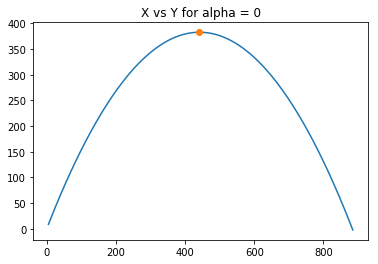

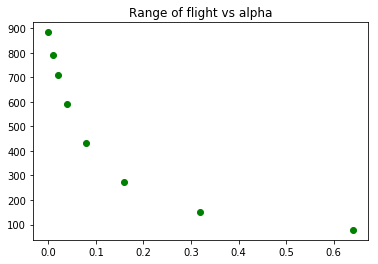

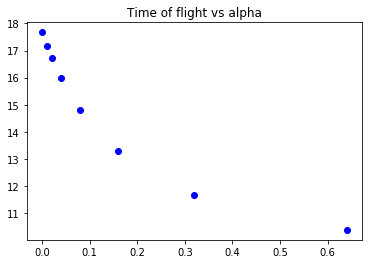

In [55]:
import math
import matplotlib.pyplot as plt

a_list = [0,.01, .02, .04, .08, .16, .32, .64]
range_of_flight_ls = []
time_of_flight_ls = []

for a in a_list:
    g = 9.8
    alpha = a
    beta = 0


    # Set initial position and velocity.

    x0 = 0.0
    y0 = 0.0

    v0    = 100				# unit: m/s 
    theta = 60.0				# (degrees) , angle with horizontal 

    # Determine components of the initial velocity vector.
    vx0 = v0 * math.cos( math.radians(theta) )
    vy0 = v0 * math.sin( math.radians(theta) )

    # Set parameters governing the numerical details.
    dt    = 0.1
    t_max = 15.0

    # Initialize the trajectory.
    t = 0.0

    x = x0
    xp = x

    y = y0
    yp = y

    vx = vx0
    vy = vy0

    # acceleration due to gravity
    x_pos = []
    y_pos = []

    x_pos_analytic = []
    y_pos_analytic = []

    height = []
    pos_height = []
    time = []

    def interp(x0, y0, x1, y1, x=None, y=None):
        if y == None:
            return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
        elif x == None:
            return (y-y0) * (x1 - x0) / (y1 - y0) + x0

    def acc(x, y, vx, vy, t):
        global alpha, beta
        return -alpha*vx - beta*abs(vx)*vx, -g - alpha*vy - beta*abs(vy)*vy

    def take_a_step(x, y, vx, vy, t, dt):

        ax,ay = acc(x, y, vx, vy, t)

        # Predict: 
        x  += vx*dt + 0.5*ax*dt*dt
        y  += vy*dt + 0.5*ay*dt*dt
        vx += ax*dt
        vy += ay*dt

        # Correct: 
        ax1,ay1 = acc(x, y, vx, vy, t)

        vx += 0.5*(ax1-ax)*dt
        vy += 0.5*(ay1-ay)*dt

        t += dt

        return x,y,vx,vy,t

    def analytic(t):
        x = x0 + vx0*t
        y = y0 + vy0*t - .5*g*t**2
        return x, y

    def check_amplitude(yp, y, yf, x):
            if (yp < y) and (yf <= y):
                height.append(y)
                pos_height.append(x)




    # Calculate the trajectory to time t_max, using the 2D
    # predictor-corrector scheme.

    while y>=0:
        xp, yp = x, y
        x,y,vx,vy,t = take_a_step(x, y, vx, vy, t, dt)
        xf, yf = take_a_step(x, y, vx, vy, t, dt)[0:2]
        x_ana, y_ana = analytic(t)

        check_amplitude(yp, y, yf, x)

        x_pos.append(x)
        y_pos.append(y)
        x_pos_analytic.append(x_ana)
        y_pos_analytic.append(y_ana)

        time.append(t)
        
    range_of_flight_ls.append(interp(x_pos[-2], y_pos[-2], x_pos[-1], y_pos[-1], y = 0))
    time_of_flight_ls.append(interp(time[-2], y_pos[-2], time[-1], y_pos[-1], y = 0))

    if alpha == 0:
        range_of_flight = (interp(x_pos[-2], y_pos[-2], x_pos[-1], y_pos[-1], y = 0))
        time_of_flight  = (interp(time[-2], y_pos[-2], time[-1], y_pos[-1], y=0))
        range_of_flight_analytic = interp(x_pos_analytic[-2], y_pos_analytic[-2], x_pos_analytic[-1], y_pos_analytic[-1], y = 0)
        time_of_flight_analytic = interp(time[-2], y_pos_analytic[-2], time[-1], y_pos_analytic[-1], y=0)
        
        plt.figure()
        plt.plot(x_pos, y_pos)
        plt.plot(pos_height, height, 'o')
        plt.title('X vs Y for alpha = 0')

        #print('The height of flight: {:.5f}m at position: {:.5f}m'.format(alpha, height[-1], pos_height[-1]))

        print('\nThe range of flight numerically: {:.5f}m'.format(range_of_flight))
        print('The range of flight anayltically: {:.5f}m'.format(range_of_flight_analytic))

        print('\nThe time of flight numerically: {:.5f}s'.format(time_of_flight))
        print('The time of flight analytically: {:.5f}s'.format(time_of_flight_analytic))
        print('Both range of flight and time of flight agree numerically and analytically.')

plt.figure()
plt.plot(a_list, range_of_flight_ls, 'go')
plt.title('Range of flight vs alpha')

plt.figure()
plt.plot(a_list, time_of_flight_ls, 'bo')
plt.title('Time of flight vs alpha')



In [56]:
import math
import matplotlib.pyplot as plt


g = 9.8
alpha = .1
beta = 0
v0 = 192.92
range_of_flight = 0

while range_of_flight < 883.69393:
    # Set initial position and velocity.

    x0 = 0.0
    y0 = 0.0

   				# unit: m/s 
    theta = 60.0				# (degrees) , angle with horizontal 

    # Determine components of the initial velocity vector.
    vx0 = v0 * math.cos( math.radians(theta) )
    vy0 = v0 * math.sin( math.radians(theta) )

    # Set parameters governing the numerical details.
    dt    = 0.1
    t_max = 15.0

    # Initialize the trajectory.
    t = 0.0

    x = x0
    xp = x

    y = y0
    yp = y

    vx = vx0
    vy = vy0

    # acceleration due to gravity
    x_pos = []
    y_pos = []

    x_pos_analytic = []
    y_pos_analytic = []

    height = []
    pos_height = []
    time = []

   

    # Calculate the trajectory to time t_max, using the 2D
    # predictor-corrector scheme.

    while y>=0:
        xp, yp = x, y
        x,y,vx,vy,t = take_a_step(x, y, vx, vy, t, dt)
        xf, yf = take_a_step(x, y, vx, vy, t, dt)[0:2]
        x_ana, y_ana = analytic(t)

        check_amplitude(yp, y, yf, x)

        x_pos.append(x)
        y_pos.append(y)
        x_pos_analytic.append(x_ana)
        y_pos_analytic.append(y_ana)

        time.append(t)

    range_of_flight = interp(x_pos[-2], y_pos[-2], x_pos[-1], y_pos[-1], y = 0)
    print('v0 = {}, ROF = {}'.format(v0, range_of_flight))
    v0 += .001
    
print('\nThe final v0 = {} for alpha = {}'.format(v0 - 2*.001, .1 ))
    
    
#     range_of_flight_analytic = interp(x_pos_analytic[-2], y_pos_analytic[-2], x_pos_analytic[-1], y_pos_analytic[-1], y = 0)
#     time_of_flight  = interp(time[-2], y_pos[-2], time[-1], y_pos[-1], y=0)
#     time_of_flight_analytic = interp(time[-2], y_pos_analytic[-2], time[-1], y_pos_analytic[-1], y=0)



v0 = 192.92, ROF = 883.640485197
v0 = 192.921, ROF = 883.645916494
v0 = 192.922, ROF = 883.651347802
v0 = 192.923, ROF = 883.65677912
v0 = 192.924, ROF = 883.662210449
v0 = 192.925, ROF = 883.667641788
v0 = 192.926, ROF = 883.673073138
v0 = 192.927, ROF = 883.678504498
v0 = 192.928, ROF = 883.683935868
v0 = 192.929, ROF = 883.689367249
v0 = 192.93, ROF = 883.69479864

The final v0 = 192.929 for alpha = 0.1


The first initial kinetic energy = 5000.0J, The final initial kinetic energy = 18610.7995205J
The kinetic energy changed by a factor = 3.7221599041


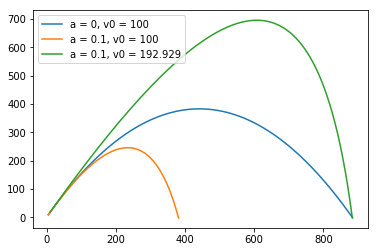

In [57]:
import math
import matplotlib.pyplot as plt

# acceleration due to gravity
a_v_list = [(0, 100), (.1, 100), (.1, 192.929)]

for alpha_int, v_int in a_v_list:

    g = 9.8
    alpha = alpha_int
    beta = 0

    x_pos = []
    y_pos = []

    x_pos_analytic = []
    y_pos_analytic = []

    height = []
    pos_height = []
    time = []

    

    # Set initial position and velocity.

    x0 = 0.0
    y0 = 0.0

    v0    = v_int				# unit: m/s 
    theta = 60.0				# (degrees) , angle with horizontal 

    # Determine components of the initial velocity vector.
    vx0 = v0 * math.cos( math.radians(theta) )
    vy0 = v0 * math.sin( math.radians(theta) )

    # Set parameters governing the numerical details.
    dt    = 0.1
    t_max = 15.0

    # Initialize the trajectory.
    t = 0.0

    x = x0
    xp = x

    y = y0
    yp = y

    vx = vx0
    vy = vy0

    # Calculate the trajectory to time t_max, using the 2D
    # predictor-corrector scheme.

    while y>=0:
        xp, yp = x, y
        x,y,vx,vy,t = take_a_step(x, y, vx, vy, t, dt)
        xf, yf = take_a_step(x, y, vx, vy, t, dt)[0:2]
        x_ana, y_ana = analytic(t)

        check_amplitude(yp, y, yf, x)

        x_pos.append(x)
        y_pos.append(y)
        x_pos_analytic.append(x_ana)
        y_pos_analytic.append(y_ana)

        time.append(t)
        
    
    plt.plot(x_pos, y_pos, '-', label = 'a = {}, v0 = {}'.format(alpha, v0))
    plt.legend()
    
ke_int = .5*100**2
ke_final = .5*192.929**2
ke_factor = ke_final/ke_int

print('The first initial kinetic energy = {}J, The final initial kinetic energy = {}J'.format(ke_int, ke_final))
print('The kinetic energy changed by a factor = {}'.format(ke_factor))

In [58]:
import math
import matplotlib.pyplot as plt

v_int_ls = [100, 200, 300, 400, 500]
v_term = []

# acceleration due to gravity
g = 9.8
alpha = .1
beta = 0
for v_int in v_int_ls:
    x_pos = []
    y_pos = []

    x_pos_analytic = []
    y_pos_analytic = []
    v_list = []

    height = []
    pos_height = []
    time = []

    

    # Set initial position and velocity.

    x0 = 0.0
    y0 = 0.0

    v0    = v_int				# unit: m/s 
    theta = 90				# (degrees) , angle with horizontal 

    # Determine components of the initial velocity vector.
    vx0 = v0 * math.cos( math.radians(theta) )
    vy0 = v0 * math.sin( math.radians(theta) )

    # Set parameters governing the numerical details.
    dt    = 0.1
    t_max = 15.0

    # Initialize the trajectory.
    t = 0.0

    x = x0
    xp = x

    y = y0
    yp = y

    vx = vx0
    vy = vy0

    # Calculate the trajectory to time t_max, using the 2D
    # predictor-corrector scheme.

    while y>=0:
        xp, yp = x, y
        x,y,vx,vy,t = take_a_step(x, y, vx, vy, t, dt)
        xf, yf = take_a_step(x, y, vx, vy, t, dt)[0:2]
        x_ana, y_ana = analytic(t)
        
        check_amplitude(yp, y, yf, x)

        x_pos.append(x)
        y_pos.append(y)
        x_pos_analytic.append(x_ana)
        y_pos_analytic.append(y_ana)
        v_list.append(vy)
        time.append(t)
        
    v_term.append(v_list[-2])
    
for i, v_t in enumerate(v_term):
    print('The terminal velocity for v0 = {} was found to be = {:.5f}'.format(v_int_ls[i], v_t))





The terminal velocity for v0 = 100 was found to be = -58.81499
The terminal velocity for v0 = 200 was found to be = -80.93309
The terminal velocity for v0 = 300 was found to be = -90.56262
The terminal velocity for v0 = 400 was found to be = -94.77580
The terminal velocity for v0 = 500 was found to be = -96.63153
